**Autor:R.** Hurtado                  

**Materia:** Procesamiento de Datos 
                            
**Topico:** Proyecto

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql import SQLContext

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
df00 = spark.read.table("dataset_1__sb11_20231_1_csv")
df00.columns

Out[7]: ['ESTU_TIPODOCUMENTO',
 'ESTU_NACIONALIDAD',
 'ESTU_GENERO',
 'ESTU_FECHANACIMIENTO',
 'PERIODO',
 'ESTU_CONSECUTIVO',
 'ESTU_ESTUDIANTE',
 'ESTU_PAIS_RESIDE',
 'ESTU_DEPTO_RESIDE',
 'ESTU_COD_RESIDE_DEPTO',
 'ESTU_MCPIO_RESIDE',
 'ESTU_COD_RESIDE_MCPIO',
 'ESTU_PRESENTACIONSABADO',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_PERSONASHOGAR',
 'FAMI_CUARTOSHOGAR',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENESERVICIOTV',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENEMOTOCICLETA',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_NUMLIBROS',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'FAMI_SITUACIONECONOMICA',
 'ESTU_DEDICACIONLECTURADIARIA',
 'ESTU_DEDICACIONINTERNET',
 'ESTU_HORASSEMANATRABAJA',
 'ESTU_TIPOREMUNERACION',
 'COLE_CODIGO_ICFES',
 'COLE_COD_DANE_ESTABLECIMIENTO',
 'COLE_NOMBRE_EST

Este dataset contiene información sobre estudiantes y su contexto sociodemográfico, académico y familiar, con el objetivo de analizar factores que puedan influir en su desempeño educativo.

In [0]:
df00.printSchema()


root
 |-- ESTU_TIPODOCUMENTO: string (nullable = true)
 |-- ESTU_NACIONALIDAD: string (nullable = true)
 |-- ESTU_GENERO: string (nullable = true)
 |-- ESTU_FECHANACIMIENTO: string (nullable = true)
 |-- PERIODO: string (nullable = true)
 |-- ESTU_CONSECUTIVO: string (nullable = true)
 |-- ESTU_ESTUDIANTE: string (nullable = true)
 |-- ESTU_PAIS_RESIDE: string (nullable = true)
 |-- ESTU_DEPTO_RESIDE: string (nullable = true)
 |-- ESTU_COD_RESIDE_DEPTO: string (nullable = true)
 |-- ESTU_MCPIO_RESIDE: string (nullable = true)
 |-- ESTU_COD_RESIDE_MCPIO: string (nullable = true)
 |-- ESTU_PRESENTACIONSABADO: string (nullable = true)
 |-- FAMI_ESTRATOVIVIENDA: string (nullable = true)
 |-- FAMI_PERSONASHOGAR: string (nullable = true)
 |-- FAMI_CUARTOSHOGAR: string (nullable = true)
 |-- FAMI_EDUCACIONPADRE: string (nullable = true)
 |-- FAMI_EDUCACIONMADRE: string (nullable = true)
 |-- FAMI_TRABAJOLABORPADRE: string (nullable = true)
 |-- FAMI_TRABAJOLABORMADRE: string (nullable = true)

**Datos Personales y de Ubicación:**

ESTU_NACIONALIDAD: Nacionalidad del estudiante.

ESTU_GENERO: Género del estudiante.

ESTU_FECHANACIMIENTO: Fecha de nacimiento del estudiante.

ESTU_PAIS_RESIDE, ESTU_DEPTO_RESIDE, ESTU_COD_RESIDE_DEPTO, ESTU_MCPIO_RESIDE, ESTU_COD_RESIDE_MCPIO: Datos de residencia del estudiante.

ESTU_COD_MCPIO_PRESENTACION, ESTU_MCPIO_PRESENTACION, ESTU_DEPTO_PRESENTACION, ESTU_COD_DEPTO_PRESENTACION: Ubicación del lugar donde presentó la prueba.

**Datos Académicos y del Colegio:**

COLE_CODIGO_ICFES, COLE_COD_DANE_ESTABLECIMIENTO, COLE_NOMBRE_ESTABLECIMIENTO, COLE_NATURALEZA, COLE_CALENDARIO, COLE_BILINGUE, COLE_CARACTER: Identificadores y características del colegio.

COLE_COD_MCPIO_UBICACION, COLE_MCPIO_UBICACION, COLE_COD_DEPTO_UBICACION, COLE_DEPTO_UBICACION: Ubicación geográfica del colegio.

**Contexto Familiar y Socioeconómico:**

FAMI_ESTRATOVIVIENDA, FAMI_PERSONASHOGAR, FAMI_CUARTOSHOGAR: Información sobre el hogar del estudiante.

FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, FAMI_TRABAJOLABORPADRE, FAMI_TRABAJOLABORMADRE: Nivel educativo y ocupación de los padres.

FAMI_TIENEINTERNET, FAMI_TIENESERVICIOTV, FAMI_TIENECOMPUTADOR, FAMI_TIENELAVADORA, FAMI_TIENEHORNOMICROOGAS, FAMI_TIENEAUTOMOVIL, FAMI_TIENEMOTOCICLETA, FAMI_TIENECONSOLAVIDEOJUEGOS: Bienes disponibles en el hogar.

FAMI_NUMLIBROS: Número de libros en el hogar.

FAMI_COMELECHEDERIVADOS, FAMI_COMECARNEPESCADOHUEVO, FAMI_COMECEREALFRUTOSLEGUMBRE: Hábitos alimenticios del estudiante.

FAMI_SITUACIONECONOMICA: Percepción de la situación económica familiar.

**Hábitos del Estudiante:**

ESTU_DEDICACIONLECTURADIARIA, ESTU_DEDICACIONINTERNET: Tiempo dedicado a lectura y uso de internet.

ESTU_HORASSEMANATRABAJA: Horas semanales de trabajo.

ESTU_TIPOREMUNERACION: Tipo de remuneración si trabaja.

**Resultados Académicos:**

PUNT_LECTURA_CRITICA, PUNT_MATEMATICAS, PUNT_C_NATURALES, PUNT_SOCIALES_CIUDADANAS, PUNT_INGLES, PUNT_GLOBAL: Puntajes obtenidos en cada área.

PERCENTIL_LECTURA_CRITICA, PERCENTIL_MATEMATICAS, PERCENTIL_C_NATURALES, PERCENTIL_SOCIALES_CIUDADANAS, PERCENTIL_INGLES, PERCENTIL_GLOBAL: Percentil de desempeño respecto a otros estudiantes.

DESEMP_LECTURA_CRITICA, DESEMP_MATEMATICAS, DESEMP_C_NATURALES, DESEMP_SOCIALES_CIUDADANAS, DESEMP_INGLES: Desempeño cualitativo en cada área.

ESTU_INSE_INDIVIDUAL, ESTU_NSE_INDIVIDUAL, ESTU_NSE_ESTABLECIMIENTO: Nivel socioeconómico individual y del colegio.

PERCENTIL_ESPECIAL_GLOBAL: Percentil en una categoría especial.

In [0]:
df00.show(5)

+------------------+-----------------+-----------+--------------------+-------+----------------+---------------+----------------+-----------------+---------------------+-----------------+---------------------+-----------------------+--------------------+------------------+-----------------+--------------------+--------------------+----------------------+----------------------+------------------+--------------------+--------------------+------------------+------------------------+-------------------+---------------------+----------------------------+-----------------+-----------------------+--------------------------+-----------------------------+-----------------------+----------------------------+-----------------------+-----------------------+---------------------+-----------------+-----------------------------+---------------------------+--------------+------------+-----------+---------------+---------------+-------------+-------------+------------------+--------------------+-------

**GRAFICAS**

In [0]:
# Convertir las columnas de puntajes a tipo numérico
puntaje_cols = [
    "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", 
    "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PUNT_GLOBAL"
]

for col_name in puntaje_cols:
    df00 = df00.withColumn(col_name, df00[col_name].cast("int"))

# Estadísticos descriptivos
df00.select(puntaje_cols).describe().show()

+-------+--------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|PUNT_LECTURA_CRITICA|  PUNT_MATEMATICAS|  PUNT_C_NATURALES|PUNT_SOCIALES_CIUDADANAS|       PUNT_INGLES|       PUNT_GLOBAL|
+-------+--------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               12704|             12704|             12704|                   12704|             12702|             12704|
|   mean|   64.46977329974811| 64.01676637279597|  61.0018104534005|       60.82588161209068| 72.88206581640686| 316.8503620906801|
| stddev|    9.23435289961034|11.869270818515023|10.258291291226984|      11.093112279949803|13.992488268429188|48.062084722816614|
|    min|                  25|                16|                27|                      24|                26|               140|
|    max|                 100|               100|               100|        

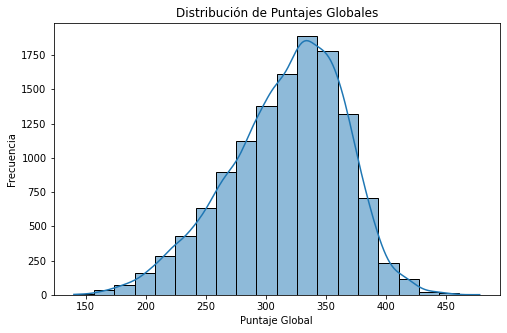

In [0]:
# Histograma de puntajes
df_pandas = df00.select("PUNT_GLOBAL").toPandas()
plt.figure(figsize=(8,5))
sns.histplot(df_pandas["PUNT_GLOBAL"], bins=20, kde=True)
plt.title("Distribución de Puntajes Globales")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.show()

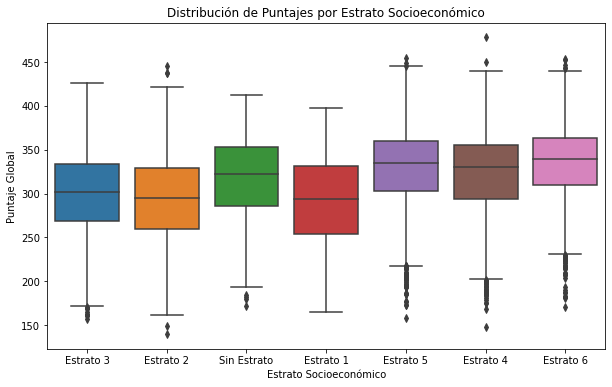

In [0]:
# Boxplot de puntajes según estrato socioeconómico
df_pandas = df00.select("PUNT_GLOBAL", "FAMI_ESTRATOVIVIENDA").toPandas()
plt.figure(figsize=(10,6))
sns.boxplot(x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", data=df_pandas)
plt.title("Distribución de Puntajes por Estrato Socioeconómico")
plt.xlabel("Estrato Socioeconómico")
plt.ylabel("Puntaje Global")
plt.show()


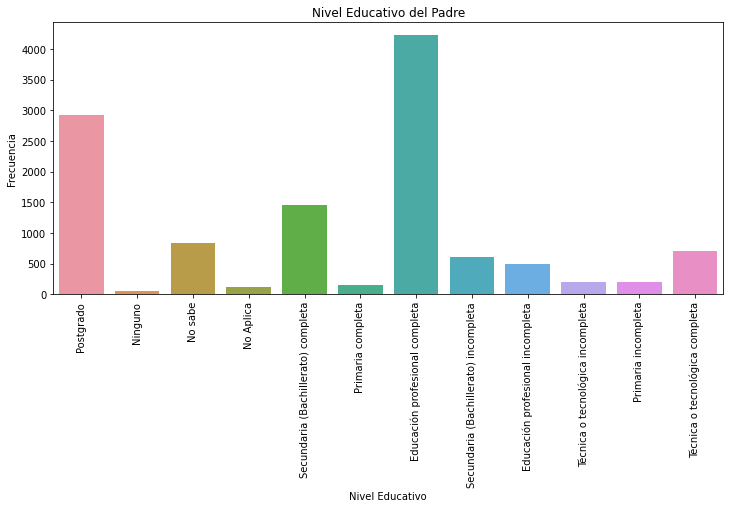

In [0]:
# Gráfico de barras del nivel educativo de los padres
df_pandas = df00.groupBy("FAMI_EDUCACIONPADRE").count().toPandas()
plt.figure(figsize=(12,5))
sns.barplot(y=df_pandas["count"], x=df_pandas["FAMI_EDUCACIONPADRE"])
plt.xticks(rotation=90)
plt.title("Nivel Educativo del Padre")
plt.xlabel("Nivel Educativo")
plt.ylabel("Frecuencia")
plt.show()



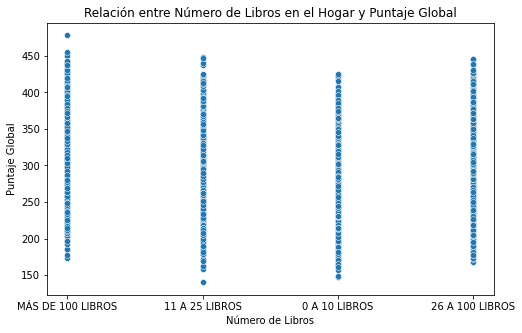

In [0]:
# Gráfico de dispersión entre número de libros en el hogar y puntajes
df_pandas = df00.select("PUNT_GLOBAL", "FAMI_NUMLIBROS").toPandas()
plt.figure(figsize=(8,5))
sns.scatterplot(x="FAMI_NUMLIBROS", y="PUNT_GLOBAL", data=df_pandas)
plt.title("Relación entre Número de Libros en el Hogar y Puntaje Global")
plt.xlabel("Número de Libros")
plt.ylabel("Puntaje Global")
plt.show()


In [0]:

# Tabla agregada: promedio de puntajes por género
df00.groupBy("ESTU_GENERO").agg(F.mean("PUNT_GLOBAL").alias("Promedio Puntaje Global")).show()

+-----------+-----------------------+
|ESTU_GENERO|Promedio Puntaje Global|
+-----------+-----------------------+
|          F|     314.61416705845477|
|          M|      319.1070694290685|
+-----------+-----------------------+



In [0]:
# Relación entre horas de internet y desempeño académico
df00.groupBy("ESTU_DEDICACIONINTERNET").agg(F.mean("PUNT_GLOBAL").alias("Promedio Puntaje Global")).show()

+-----------------------+-----------------------+
|ESTU_DEDICACIONINTERNET|Promedio Puntaje Global|
+-----------------------+-----------------------+
|      Entre 1 y 3 horas|      323.6746274749949|
|                   null|       299.125641025641|
|     30 minutos o menos|      295.2450331125828|
|     No Navega Internet|     294.54128440366975|
|         Más de 3 horas|     318.22285714285715|
|   Entre 30 y 60 min...|     310.96481271282636|
+-----------------------+-----------------------+

